## ROUND 2

In [1144]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1145]:
# Load document & Show shape

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data.shape

(10910, 26)

In [1146]:
# Drop Unnamed: 0 & Customer columns

data.drop(['Unnamed: 0', 'Customer'], inplace=True, axis=1)

In [1147]:
# Standardize header names

data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [1148]:
# Get numerical data

numericals = data.select_dtypes(np.number)

In [1149]:
# Get categorial data

categorical = data.select_dtypes(object)

In [1150]:
# Check NaN values

data.isna().sum()

state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [1151]:
# months_since_last_claim : replace NaN with mean

data['months_since_last_claim'] = data['months_since_last_claim'].fillna(data['months_since_last_claim'].mean())

In [1152]:
# number_of_open_complaints : replace NaN with mean

data['number_of_open_complaints'] = data['number_of_open_complaints'].fillna(data['number_of_open_complaints'].mean())

In [1153]:
# state : replace NaN with mode

data['state'] = data['state'].fillna(data['state'].mode()[0])

In [1154]:
# response : replace NaN with mode

data['response'] = data['response'].fillna(data['response'].mode()[0])

In [1155]:
# vehicle_class : replace NaN with mode

data['vehicle_class'] = data['vehicle_class'].fillna(data['vehicle_class'].mode()[0])

In [1156]:
# vehicle_size : replace NaN with mode

data['vehicle_size'] = data['vehicle_size'].fillna(data['vehicle_size'].mode()[0])

In [1157]:
# vehicle_type : replace NaN with M

data['vehicle_type'] = data['vehicle_type'].fillna('M')

In [1158]:
# Check again NaN values

data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [1159]:
# Create month column from effective_to_date

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['month_effective_to_date'] = data['effective_to_date'].dt.month

In [1160]:
# response : convert to boolean

data['response'] = data['response'].map({'Yes': True, 'No': False})

In [1161]:
# Filter data from first quarter

data = data[data['month_effective_to_date'].isin([1,2,3])]

In [1162]:
# Create cleanup function

def standardize_header(dataframe):
    dataframe.drop(['Unnamed: 0', 'Customer'], inplace=True, axis=1)
    dataframe = dataframe.rename(columns={'EmploymentStatus':'Employment Status'})
    dataframe.columns = dataframe.columns.str.lower().str.replace(' ', '_')
    return dataframe

def fill_nan_with_mean(dataframe, columns):
    for col_name in columns:
        dataframe[col_name] = dataframe[col_name].fillna(dataframe[col_name].mean())
    return dataframe

def fill_nan_with_mode(dataframe, columns):
    for col_name in columns:
        dataframe[col_name] = dataframe[col_name].fillna(dataframe[col_name].mode()[0])
    return dataframe

def cleanup(dataframe):
    dataframe = standardize_header(dataframe)
    dataframe = fill_nan_with_mean(dataframe, ['months_since_last_claim', 'number_of_open_complaints'])
    dataframe = fill_nan_with_mode(dataframe, ['state', 'response', 'vehicle_class', 'vehicle_size'])
    
    # vehicle_type : replace NaN with M
    dataframe['vehicle_type'] = dataframe['vehicle_type'].fillna('M')

    # Create month column from effective_to_date
    dataframe['effective_to_date'] = pd.to_datetime(dataframe['effective_to_date'], errors='coerce')
    dataframe['month_effective_to_date'] = dataframe['effective_to_date'].dt.month

    # response : convert to boolean
    dataframe['response'] = dataframe['response'].map({'Yes': True, 'No': False})
    
    # Filter data from first quarter
    return dataframe[dataframe['month_effective_to_date'].isin([1,2,3])]

In [1163]:
# Load document & Show shape

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data = cleanup(data)
data.shape

(10910, 25)

## ROUND 3

In [1164]:
# Show dataframe info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10910 non-null  object        
 1   customer_lifetime_value        10910 non-null  float64       
 2   response                       10910 non-null  bool          
 3   coverage                       10910 non-null  object        
 4   education                      10910 non-null  object        
 5   effective_to_date              10910 non-null  datetime64[ns]
 6   employment_status              10910 non-null  object        
 7   gender                         10910 non-null  object        
 8   income                         10910 non-null  int64         
 9   location_code                  10910 non-null  object        
 10  marital_status                 10910 non-null  object        
 11  monthly_premium

In [1165]:
# Describe dataframe

data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month_effective_to_date,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


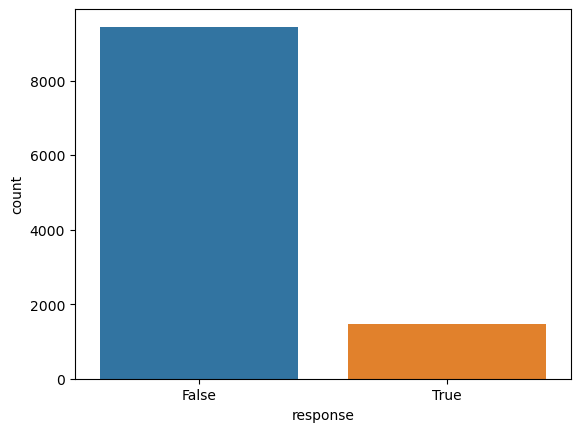

In [1166]:
# Show plot of the total number of responses

plt.figure('response')
sns.countplot(x='response', data=data)
plt.show()

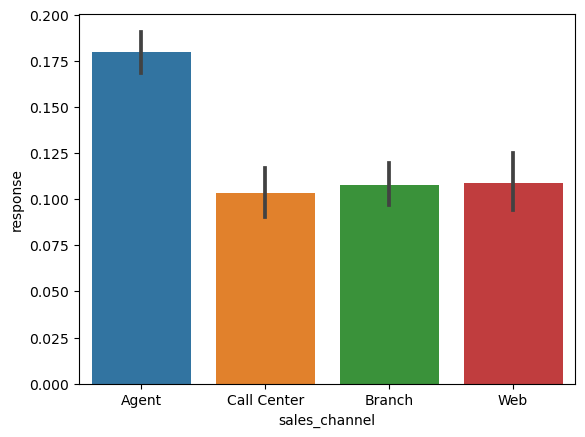

In [1167]:
# Show plot of the response rate by the sales channel

sns.barplot(x="sales_channel", y="response", data=data)
plt.show()

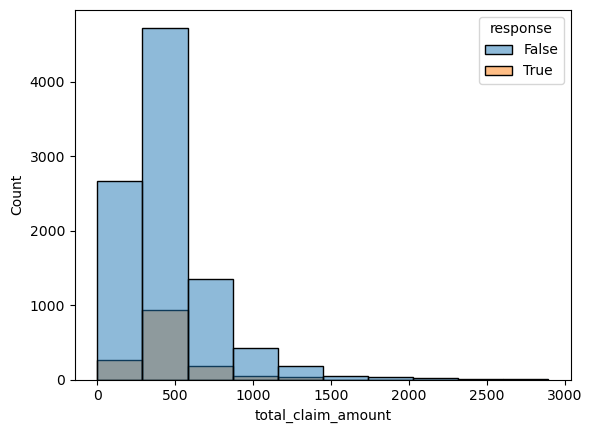

In [1168]:
# Show plot of the response rate by the total claim amount

sns.histplot(data=data, x='total_claim_amount', hue='response', bins=10)
plt.show()

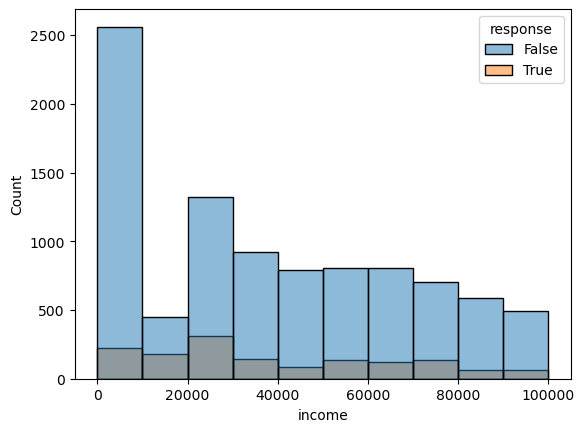

In [1169]:
# Show plot of the response rate by the income

sns.histplot(data=data, x='income', hue='response', bins=10)
plt.show()

## ROUND 4

In [1170]:
# Check columns types

data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                   bool
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [1171]:
# Get numerical data

numericals = data.select_dtypes(np.number)

In [1172]:
# Get categorial data

categorical = data.select_dtypes(object)

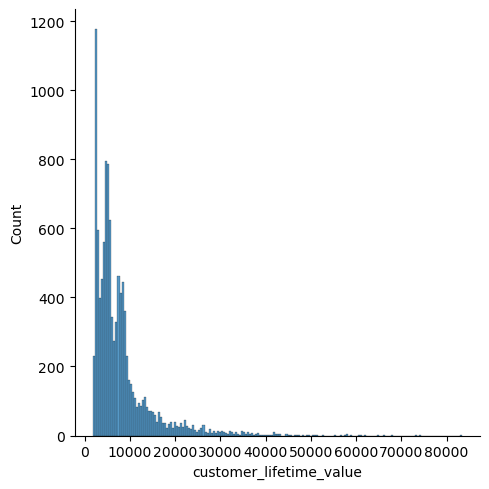

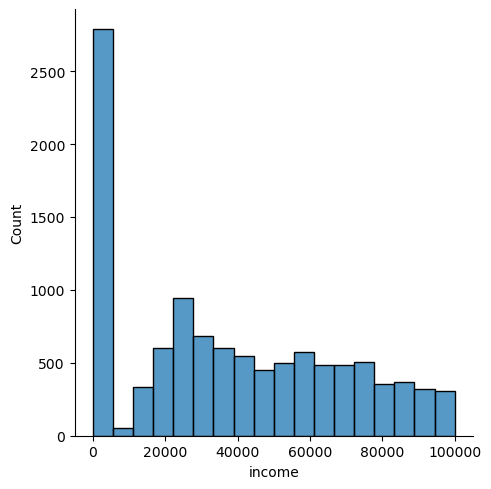

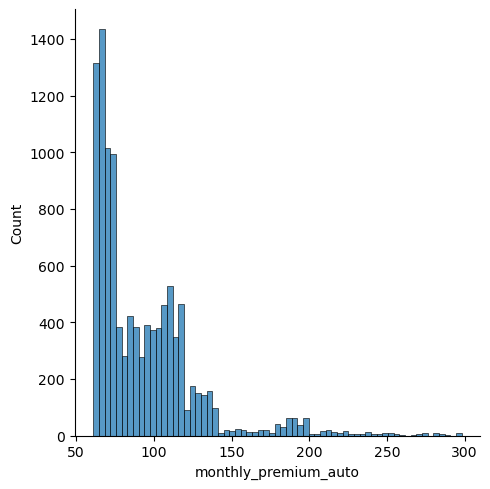

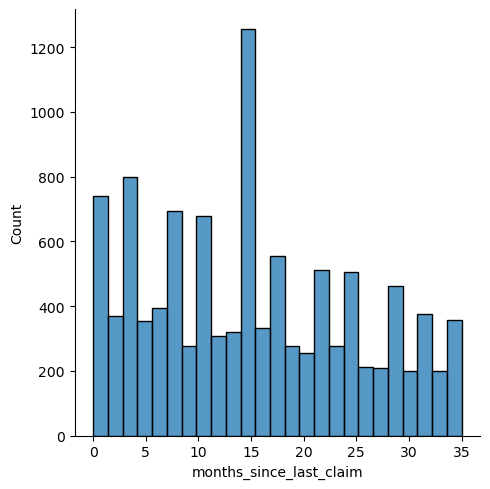

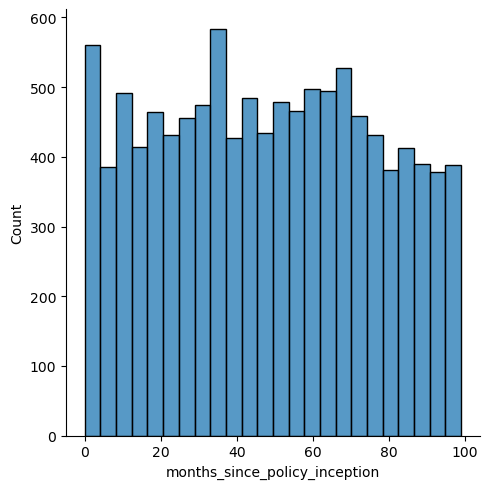

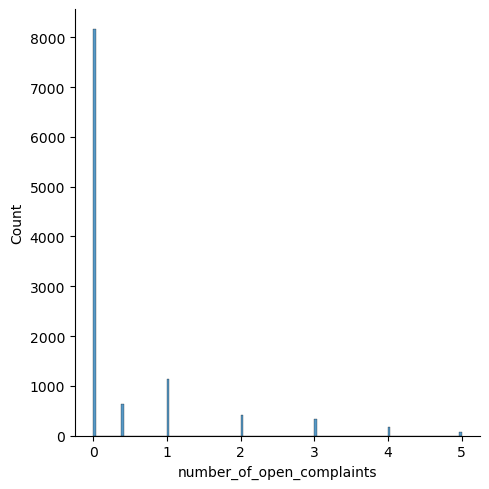

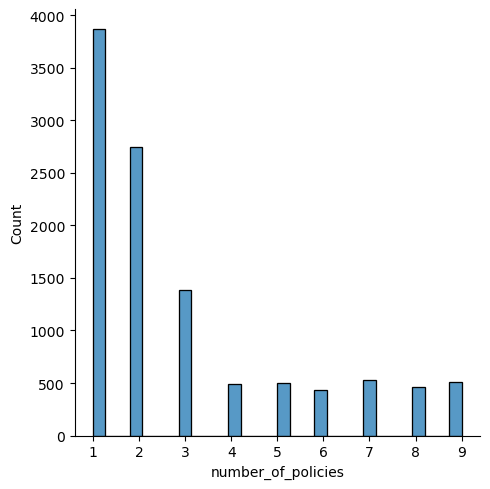

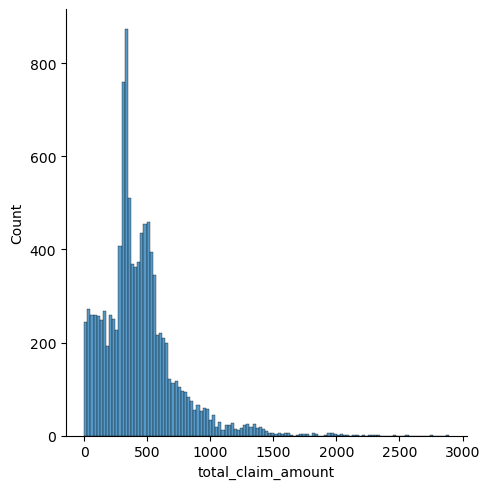

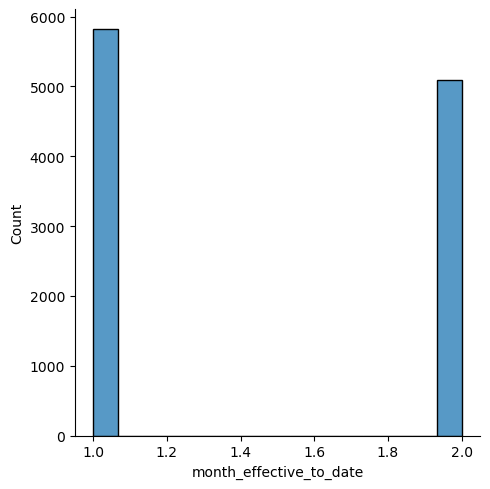

In [1173]:
# Plot numerical variables

for col_name in numericals:
    sns.displot(numericals[col_name])
    plt.show()

customer_lifetime_value


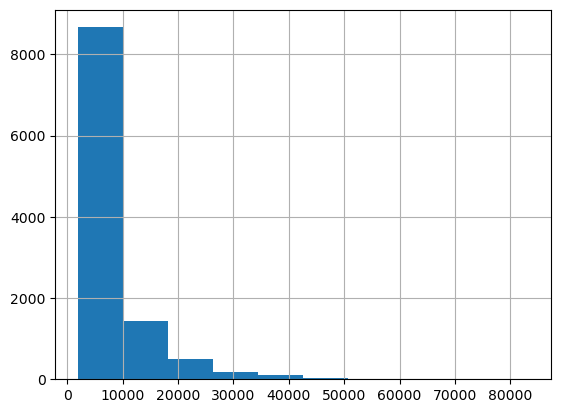

income


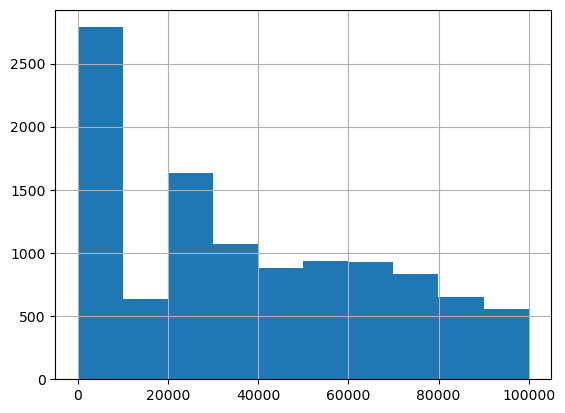

monthly_premium_auto


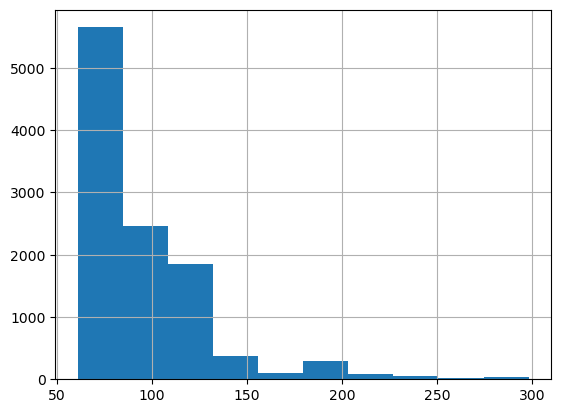

months_since_last_claim


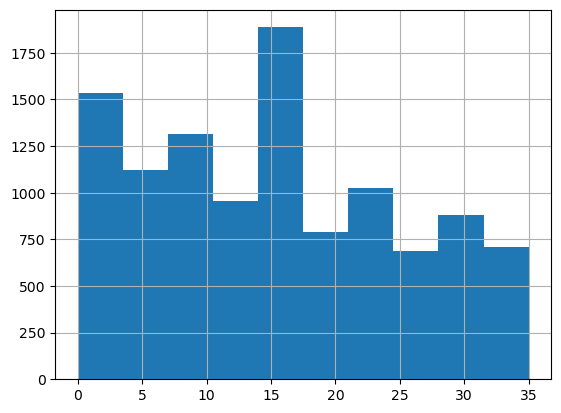

months_since_policy_inception


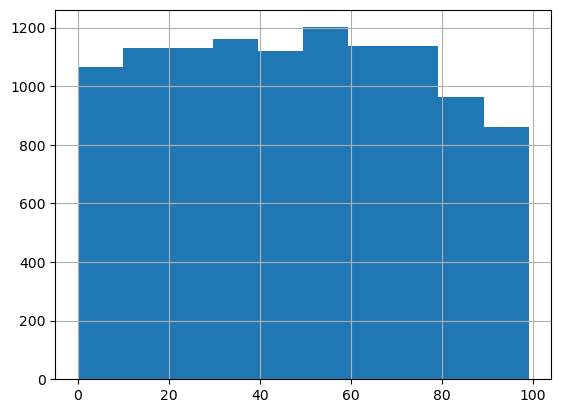

number_of_open_complaints


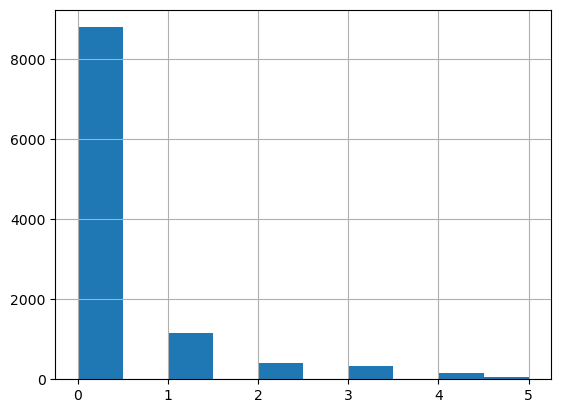

number_of_policies


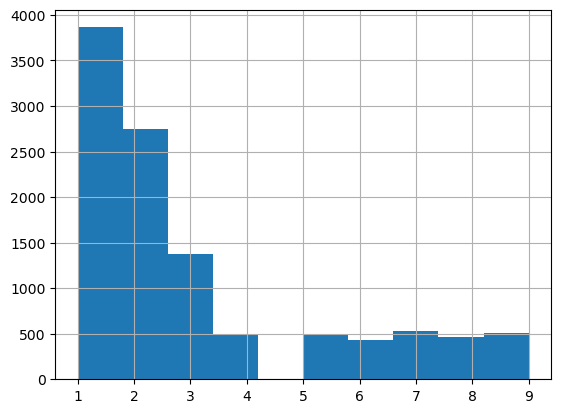

total_claim_amount


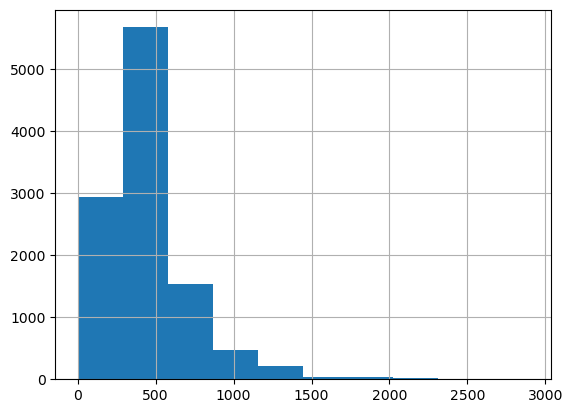

month_effective_to_date


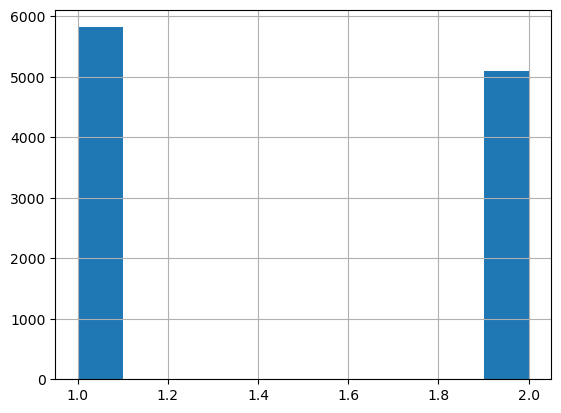

In [1174]:
# Show histograms of numerical variables

for col_name in numericals:
    print(col_name)
    numericals[col_name].hist()
    plt.show()

In [1175]:
# We cannot see any symmetric pattern. 
# Numerical variables don't look like normally distributed.

In [1176]:
# Show correlation matrix

numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month_effective_to_date
customer_lifetime_value,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month_effective_to_date,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


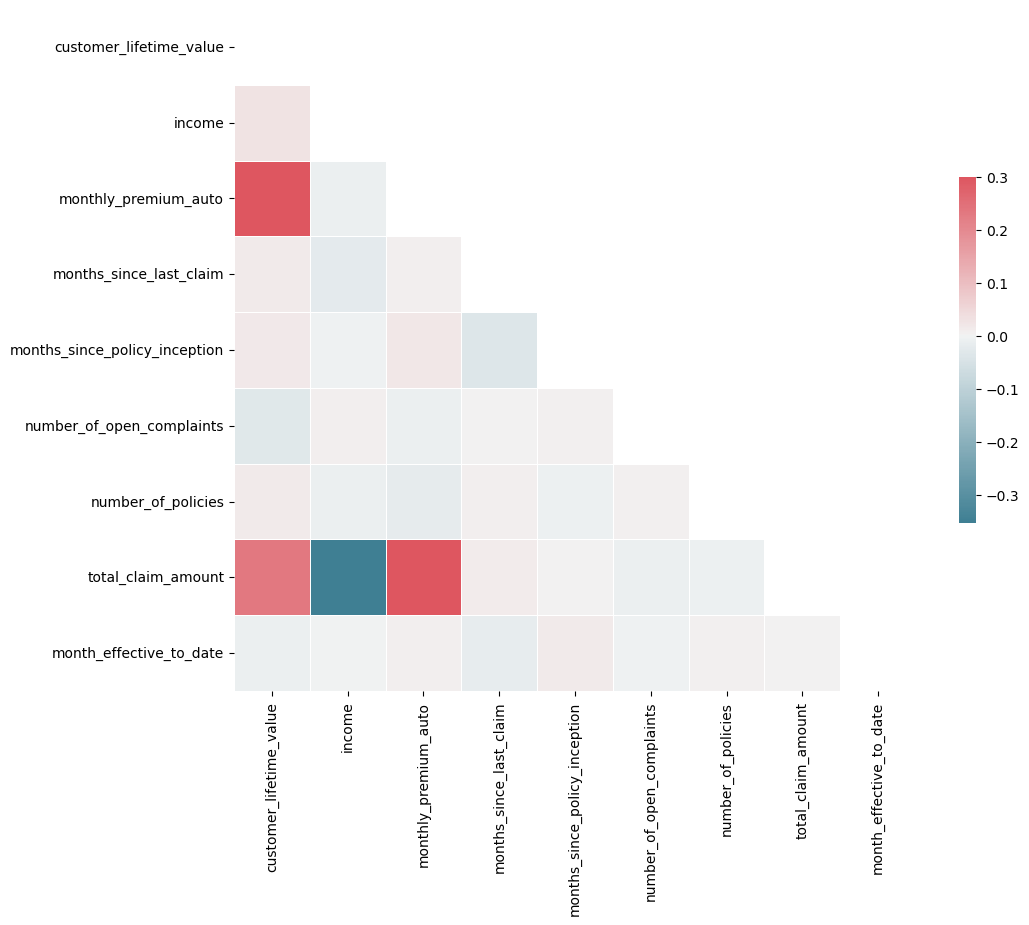

In [1177]:
# Display correlation heatmap

corr=numericals.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
f, ax=plt.subplots(figsize=(11, 9))
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [1178]:
# It seems there is no highly correlated features. 
# We will not drop any column.

## ROUND 5

In [1179]:
# Transform effective_to_date column into week/weekend

def transform_to_week_weekend(cell):
    if cell.dayofweek <= 4:
        return 'week_day'
    return 'weekend'

data['effective_to_date'] = pd.to_datetime(data['effective_to_date']).apply(transform_to_week_weekend)

In [1180]:
# Remove policy type from policy column

data['policy'] = data['policy'].replace(to_replace='\w+ ', value='', regex=True)

In [1181]:
# Unify vehicle_class column

def unify_vehicle_class(cell):
    if cell in ['Four-Door Car', 'SUV', 'Luxury SUV', 'Luxury Car']:
        return 'Luxury Car'
    return 'Sports Car'

data['vehicle_class'] = data['vehicle_class'].apply(unify_vehicle_class)

In [1182]:
# Unify employment_status column

def unify_employment_status(cell):
    if cell in ['Employed', 'Medical Leave', 'Disabled']:
        return 'Employed'
    return 'Unemployed'

data['employment_status'] = data['employment_status'].apply(unify_employment_status)

In [1183]:
# Map categorical columns into int values

def get_mapping(dataframe):
    dictionary = {}
    values = dataframe.unique()
    for idx, val in enumerate(values):
        dictionary.update({val : idx})
    
    return dictionary

ordinal_encoding_columns = ['response', 'coverage', 'employment_status', 'vehicle_size']

for col_name in ordinal_encoding_columns:
    mapping = get_mapping(data[col_name])
    data[col_name] = data[col_name].map(mapping)

In [1184]:
# X-y split

X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']

In [1185]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1186]:
# Select numerical features

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

In [1187]:
# Standardize numerical features

transformer = MinMaxScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

## ROUND 6

In [1188]:
# Select categorical features

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [1189]:
# One Hot encode categorical features

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [1190]:
# Concat numerical and categorical features

X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [1191]:
# Test linear regression

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

train_score=LR.score(X_train, y_train)
test_score=LR.score(X_test, y_test)
print ('Model: {}, train R2: {} -- test R2: {}'.format(LR, train_score, test_score))

Model: LinearRegression(), train R2: 0.7673563353033931 -- test R2: 0.7704770755314065


In [1192]:
# Check r2_score on prediction for X_train

prediction_train = LR.predict(X_train)
r2_score(y_train, prediction_train)

0.7673563353033931

In [1193]:
# R2 validation

prediction_test = LR.predict(X_test)
r2_score(y_test, prediction_test)

0.7704770755314065

In [1194]:
# MSE validation

mse = mean_squared_error(y_test, prediction_test)
mse

19820.91915792687

In [1195]:
# RMSE validation

math.sqrt(mse)

140.7867861623628

In [1196]:
# MAE validation

mean_absolute_error(y_test, prediction_test)

95.52857008895764

## ROUND 7

In [1197]:
# Drop month_effective_to_date column

data.drop('month_effective_to_date', axis=1, inplace=True)

In [1198]:
# X-y split

X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']

In [1199]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1200]:
# Select numerical features

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

In [1201]:
# Standardize numerical features

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [1202]:
# Select categorical features

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [1203]:
# One Hot encode categorical features

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [1204]:
# Concat numerical and categorical features

X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [1205]:
# Test linear regression

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

train_score=LR.score(X_train, y_train)
test_score=LR.score(X_test, y_test)
print ('Model: {}, train R2: {} -- test R2: {}'.format(LR, train_score, test_score))

Model: LinearRegression(), train R2: 0.7634026181326093 -- test R2: 0.7880174037889535


## FINAL ROUND

In [ ]:
# Display shape

data.shape

In [ ]:
# Drop duplicate rows

data = data.drop_duplicates()
data.shape

In [ ]:
# X-y split

X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Select numerical features

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

In [ ]:
# Standardize numerical features

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [ ]:
# Select categorical features

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [ ]:
# One Hot encode categorical features

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [ ]:
# Concat numerical and categorical features

X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [ ]:
# Test linear regression

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

train_score=LR.score(X_train, y_train)
test_score=LR.score(X_test, y_test)
print ('Model: {}, train R2: {} -- test R2: {}'.format(LR, train_score, test_score))

In [1214]:
# Display predictions on X_test

prediction_test = LR.predict(X_test)
pd.concat([data['total_claim_amount'],pd.Series(prediction_test, name='total_claim_amount_predicted')],axis=1).head()

,total_claim_amount,total_claim_amount_predicted
0,292.800000,526.845743
1,744.924331,193.862957
2,480.000000,87.130634
3,484.013411,666.376273
4,707.925645,317.835309
